# 1. Importer les packages

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

# 2. Charger les données

In [2]:
data = pd.read_csv('Bank_Data_converted.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# 3. Analyse de données

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

# 4. Pretraitement des donnees

In [5]:
encoder = LabelEncoder()

In [6]:
# Encoder tous les variables categorielles
data['job'] = encoder.fit_transform(data['job'])
data['marital'] = encoder.fit_transform(data['marital'])
data['education'] = encoder.fit_transform(data['education'])
data['default'] = encoder.fit_transform(data['default'])
data['housing'] = encoder.fit_transform(data['housing'])
data['loan'] = encoder.fit_transform(data['loan'])
data['contact'] = encoder.fit_transform(data['contact'])
data['month'] = encoder.fit_transform(data['month'])
data['poutcome'] = encoder.fit_transform(data['poutcome'])
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,no


In [7]:
data['y'] = np.where(data['y'] == 'yes', 1, 0)

In [8]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [9]:
data['y'].unique()

array([0, 1])

# 5. Diviser les donnees en variables indep et Variable Dep

In [10]:
# Diviser les donnees : Train et Test
X = data.drop(['y'], axis=1)
y = data['y']
#X = data.iloc[ : , :-1]
#y = data.iloc[ : , -1]

In [11]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [12]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [13]:
#train_test_split(X, y, train_size=0.8, random_state=27)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [15]:
print("X-train:", X_train.shape)
print("y-train:", y_train.shape)
print("X-test:", X_test.shape)
print("y-test:", y_test.shape)

X-train: (33908, 16)
y-train: (33908,)
X-test: (11303, 16)
y-test: (11303,)


# 6. Standardiser les donnees (Les variables independantes)

In [16]:
# Standardiser les Variables Indep

scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train

array([[-0.93785414, -1.02019911,  1.36316653, ..., -0.41147792,
        -0.24012005,  0.44457183],
       [-0.37182642,  1.42140211, -0.27959036, ..., -0.41147792,
        -0.24012005,  0.44457183],
       [ 1.51493266,  0.2006015 , -0.27959036, ..., -0.41147792,
        -0.24012005,  0.44457183],
       ...,
       [ 0.57155312, -1.02019911, -1.92234726, ..., -0.41147792,
        -0.24012005,  0.44457183],
       [ 0.09986335,  1.42140211,  1.36316653, ...,  2.51540966,
         0.98972598, -2.59485453],
       [-0.46616437, -0.71499895, -0.27959036, ..., -0.41147792,
        -0.24012005,  0.44457183]])

In [19]:
X_test

array([[-0.74917823, -1.02019911,  1.36316653, ...,  0.39766165,
         0.5797773 , -0.56857029],
       [ 0.0055254 , -0.71499895, -0.27959036, ...,  1.10690745,
         0.5797773 , -1.58171241],
       [ 0.57155312, -1.32539926,  1.36316653, ..., -0.41147792,
        -0.24012005,  0.44457183],
       ...,
       [ 1.2319188 , -0.10459865, -0.27959036, ..., -0.41147792,
        -0.24012005,  0.44457183],
       [ 0.38287721,  1.42140211,  1.36316653, ..., -0.41147792,
        -0.24012005,  0.44457183],
       [ 2.74132606,  0.2006015 , -1.92234726, ..., -0.41147792,
        -0.24012005,  0.44457183]])

# 7. Construire le modele du Deep Learning

In [20]:
model_dnn = Sequential()

In [21]:
model_dnn.add(Dense(32, input_shape=(16,), activation='relu'))

# Coucher Intermediaire 1
model_dnn.add(Dense(32, activation='relu'))

# Coucher Intermediaire 2
model_dnn.add(Dense(64, activation='relu'))
model_dnn.add(Dropout(0.5))

# Coucher Intermediaire 3
model_dnn.add(Dense(16, activation='relu'))

# Couche de Sortie
model_dnn.add(Dense(1, activation='sigmoid'))

model_dnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_dnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,769 (18.63 KB)

 Trainable params: 4,769 (18.63 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model_dnn.fit(X_train, y_train, epochs=150, verbose=1, validation_data=(X_test, y_test))

Epoch 1/150
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8815 - loss: 0.3322 - val_accuracy: 0.8957 - val_loss: 0.2392
Epoch 2/150
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8922 - loss: 0.2485 - val_accuracy: 0.8978 - val_loss: 0.2349
Epoch 3/150
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.8946 - loss: 0.2439 - val_accuracy: 0.9007 - val_loss: 0.2338
Epoch 4/150
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8989 - loss: 0.2359 - val_accuracy: 0.8995 - val_loss: 0.2305
Epoch 5/150
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9015 - loss: 0.2267 - val_accuracy: 0.8993 - val_loss: 0.2296
Epoch 6/150
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9029 - loss: 0.2292 - val_accuracy: 0.8999 - val_loss: 0.2286
Epoch 7/150
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9001 - loss: 0.2292 - val_accuracy: 0.8983 - val_loss: 0.2290
Epoch 8/150
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 

# 8. Evaluation du  Model de Deep Learning

In [23]:
model_dnn.evaluate(X_test, y_test)

354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8945 - loss: 0.2486


[0.23865728080272675, 0.899584174156189]

In [24]:
resultats = model_dnn.evaluate(X_test, y_test)

354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8945 - loss: 0.2486


In [25]:
print("Losss:", resultats[0])
print("Accuracy:", resultats[1] * 100)

Losss: 0.23865728080272675
Accuracy: 89.9584174156189


In [26]:
#  Visualiser l’evolution de l’entrainement du réseau de neurone
epoch_accuracy = history.history['accuracy']
epoch_loss = history.history['loss']

epoch_val_accuracy = history.history['val_accuracy']
epoch_val_loss = history.history['val_loss']

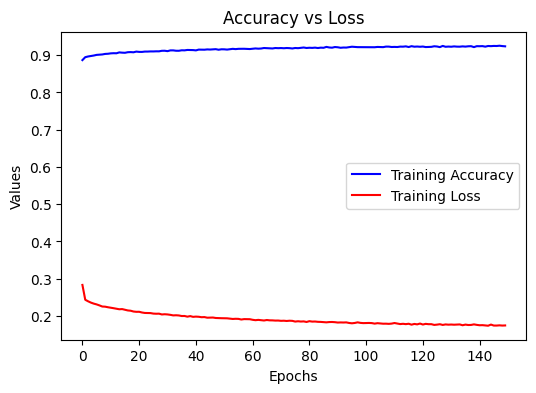

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='red', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Accuracy vs Loss')
plt.legend()
plt.show()

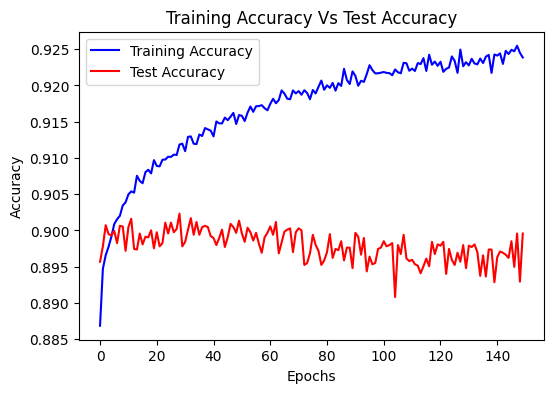

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color='red', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Vs Test Accuracy')
plt.legend()
plt.show()

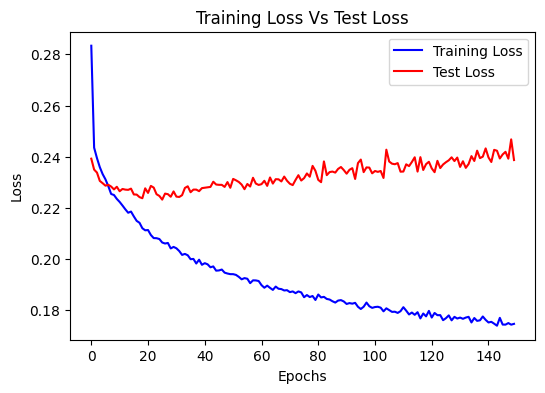

In [29]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='blue', label='Training Loss')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Vs Test Loss')
plt.legend()
plt.show()

# 9. Faire une simple Prediction

# 10. Sauvegarder le modèle du Deep Learning entrainé